In [187]:
import pandas as pd
import eurostat
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [188]:
gdp_nuts3 = pd.read_excel('gdp_nuts3.xlsx')
gdp_nuts3 = gdp_nuts3.iloc[6:-7]
gdp_nuts3.head()

C:\Users\schat\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Data extracted on 31/05/2025 10:17:48 from [ESTAT],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
6,TIME,2000,NaN,2001,NaN,2002,NaN,2003,NaN,2004,...,2019,NaN,2020,NaN,2021,NaN,2022,NaN,2023,NaN
7,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad,:,NaN,:,NaN,:,NaN,54900,NaN,57400,...,71700,p,68800,b,73800,NaN,78700,NaN,82100,p
9,Arr. Antwerpen,:,NaN,:,NaN,:,NaN,33800,NaN,35800,...,50100,p,47800,b,52800,NaN,58400,NaN,60200,p
10,Arr. Mechelen,:,NaN,:,NaN,:,NaN,28400,NaN,30500,...,46800,p,45800,b,49700,NaN,52700,NaN,55800,p


In [189]:
gdp_nuts3.drop(columns=gdp_nuts3.columns[gdp_nuts3.iloc[0].isna()], inplace=True)

In [190]:
gdp_nuts3.iloc[0].values

array(['TIME', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'], dtype=object)

In [191]:
gdp_nuts3.columns = np.append(np.array("GEO"), gdp_nuts3.iloc[0].values[1:])

In [192]:
gdp_nuts3.drop([6,7], inplace=True)
gdp_nuts3.head()

,GEO,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
8,Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad,:,:,:,54900,57400,58800,60600,62200,61800,...,64500,66100,66700,68400,69600,71700,68800,73800,78700,82100
9,Arr. Antwerpen,:,:,:,33800,35800,38300,39500,41300,42300,...,43900,45700,46800,48300,49100,50100,47800,52800,58400,60200
10,Arr. Mechelen,:,:,:,28400,30500,31900,33300,35900,35700,...,39000,40600,42100,43200,44800,46800,45800,49700,52700,55800
11,Arr. Turnhout,:,:,:,28200,29700,31300,31300,33400,33500,...,39800,40800,42500,43400,45200,48500,48700,49500,59000,60400
12,Arr. Tongeren,:,:,:,15700,16300,16900,17800,18800,19500,...,21500,22100,22300,23200,23700,23900,23000,25400,28500,29700


In [209]:
gdp_nuts3.set_index('GEO', inplace=True)

In [193]:
nuts_url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2021_4326_LEVL_3.geojson"
gdf = gpd.read_file(nuts_url)

In [194]:
gdf.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
0,DE149,3,DE,Sigmaringen,Sigmaringen,4,3,3,"POLYGON ((9.34757 48.2395, 9.60491 48.00228, 9..."
1,DE211,3,DE,"Ingolstadt, Kreisfreie Stadt","Ingolstadt, Kreisfreie Stadt",4,2,3,"POLYGON ((11.48932 48.745, 11.43311 48.69937, ..."
2,DE212,3,DE,"München, Kreisfreie Stadt","München, Kreisfreie Stadt",4,1,3,"POLYGON ((11.41245 48.12711, 11.40294 48.20312..."
3,DE213,3,DE,"Rosenheim, Kreisfreie Stadt","Rosenheim, Kreisfreie Stadt",4,2,3,"POLYGON ((11.99849 47.78836, 12.09676 47.92307..."
4,DE214,3,DE,Altötting,Altötting,4,2,3,"POLYGON ((12.94468 48.20669, 12.75156 48.11281..."


In [195]:
gdf.rename(columns={'NAME_LATN': "GEO"}, inplace=True)

In [196]:
gdf.set_index('GEO', inplace=True)

In [197]:
def f(x):
    if x == ':':
        return np.nan
    return x

In [198]:
for y in ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023']:
    gdp_nuts3[y] = gdp_nuts3[y].map(f)

In [200]:
gdp_nuts3.head()

,GEO,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
8,Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad,NaN,NaN,NaN,54900.0,57400.0,58800.0,60600.0,62200.0,61800.0,...,64500.0,66100.0,66700.0,68400.0,69600.0,71700.0,68800.0,73800.0,78700.0,82100.0
9,Arr. Antwerpen,NaN,NaN,NaN,33800.0,35800.0,38300.0,39500.0,41300.0,42300.0,...,43900.0,45700.0,46800.0,48300.0,49100.0,50100.0,47800.0,52800.0,58400.0,60200.0
10,Arr. Mechelen,NaN,NaN,NaN,28400.0,30500.0,31900.0,33300.0,35900.0,35700.0,...,39000.0,40600.0,42100.0,43200.0,44800.0,46800.0,45800.0,49700.0,52700.0,55800.0
11,Arr. Turnhout,NaN,NaN,NaN,28200.0,29700.0,31300.0,31300.0,33400.0,33500.0,...,39800.0,40800.0,42500.0,43400.0,45200.0,48500.0,48700.0,49500.0,59000.0,60400.0
12,Arr. Tongeren,NaN,NaN,NaN,15700.0,16300.0,16900.0,17800.0,18800.0,19500.0,...,21500.0,22100.0,22300.0,23200.0,23700.0,23900.0,23000.0,25400.0,28500.0,29700.0


In [212]:
gdf = gdf.join(gdp_nuts3, on='GEO', how='left')

In [214]:
gdf.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
GEO,,,,,,,,,,,,,,,,,,,,,
Sigmaringen,DE149,3,DE,Sigmaringen,4,3,3,"POLYGON ((9.34757 48.2395, 9.60491 48.00228, 9...",23200.0,23000.0,...,33600.0,34600.0,34800.0,36500.0,38300.0,39100.0,38400.0,40800.0,42900.0,NaN
"Ingolstadt, Kreisfreie Stadt",DE211,3,DE,"Ingolstadt, Kreisfreie Stadt",4,2,3,"POLYGON ((11.48932 48.745, 11.43311 48.69937, ...",51500.0,57300.0,...,124200.0,131800.0,128100.0,127500.0,127400.0,140100.0,127300.0,133500.0,143200.0,NaN
"München, Kreisfreie Stadt",DE212,3,DE,"München, Kreisfreie Stadt",4,1,3,"POLYGON ((11.41245 48.12711, 11.40294 48.20312...",58100.0,59500.0,...,71100.0,73400.0,75600.0,80100.0,81000.0,86600.0,82900.0,90500.0,94300.0,NaN
"Rosenheim, Kreisfreie Stadt",DE213,3,DE,"Rosenheim, Kreisfreie Stadt",4,2,3,"POLYGON ((11.99849 47.78836, 12.09676 47.92307...",37200.0,36200.0,...,46900.0,48100.0,51300.0,51200.0,52300.0,55800.0,53500.0,56200.0,60500.0,NaN
Altötting,DE214,3,DE,Altötting,4,2,3,"POLYGON ((12.94468 48.20669, 12.75156 48.11281...",33600.0,33800.0,...,45400.0,47200.0,47300.0,49200.0,49600.0,48300.0,48000.0,60200.0,67300.0,NaN


Text(0.5, 1.0, 'EU Regional Data')

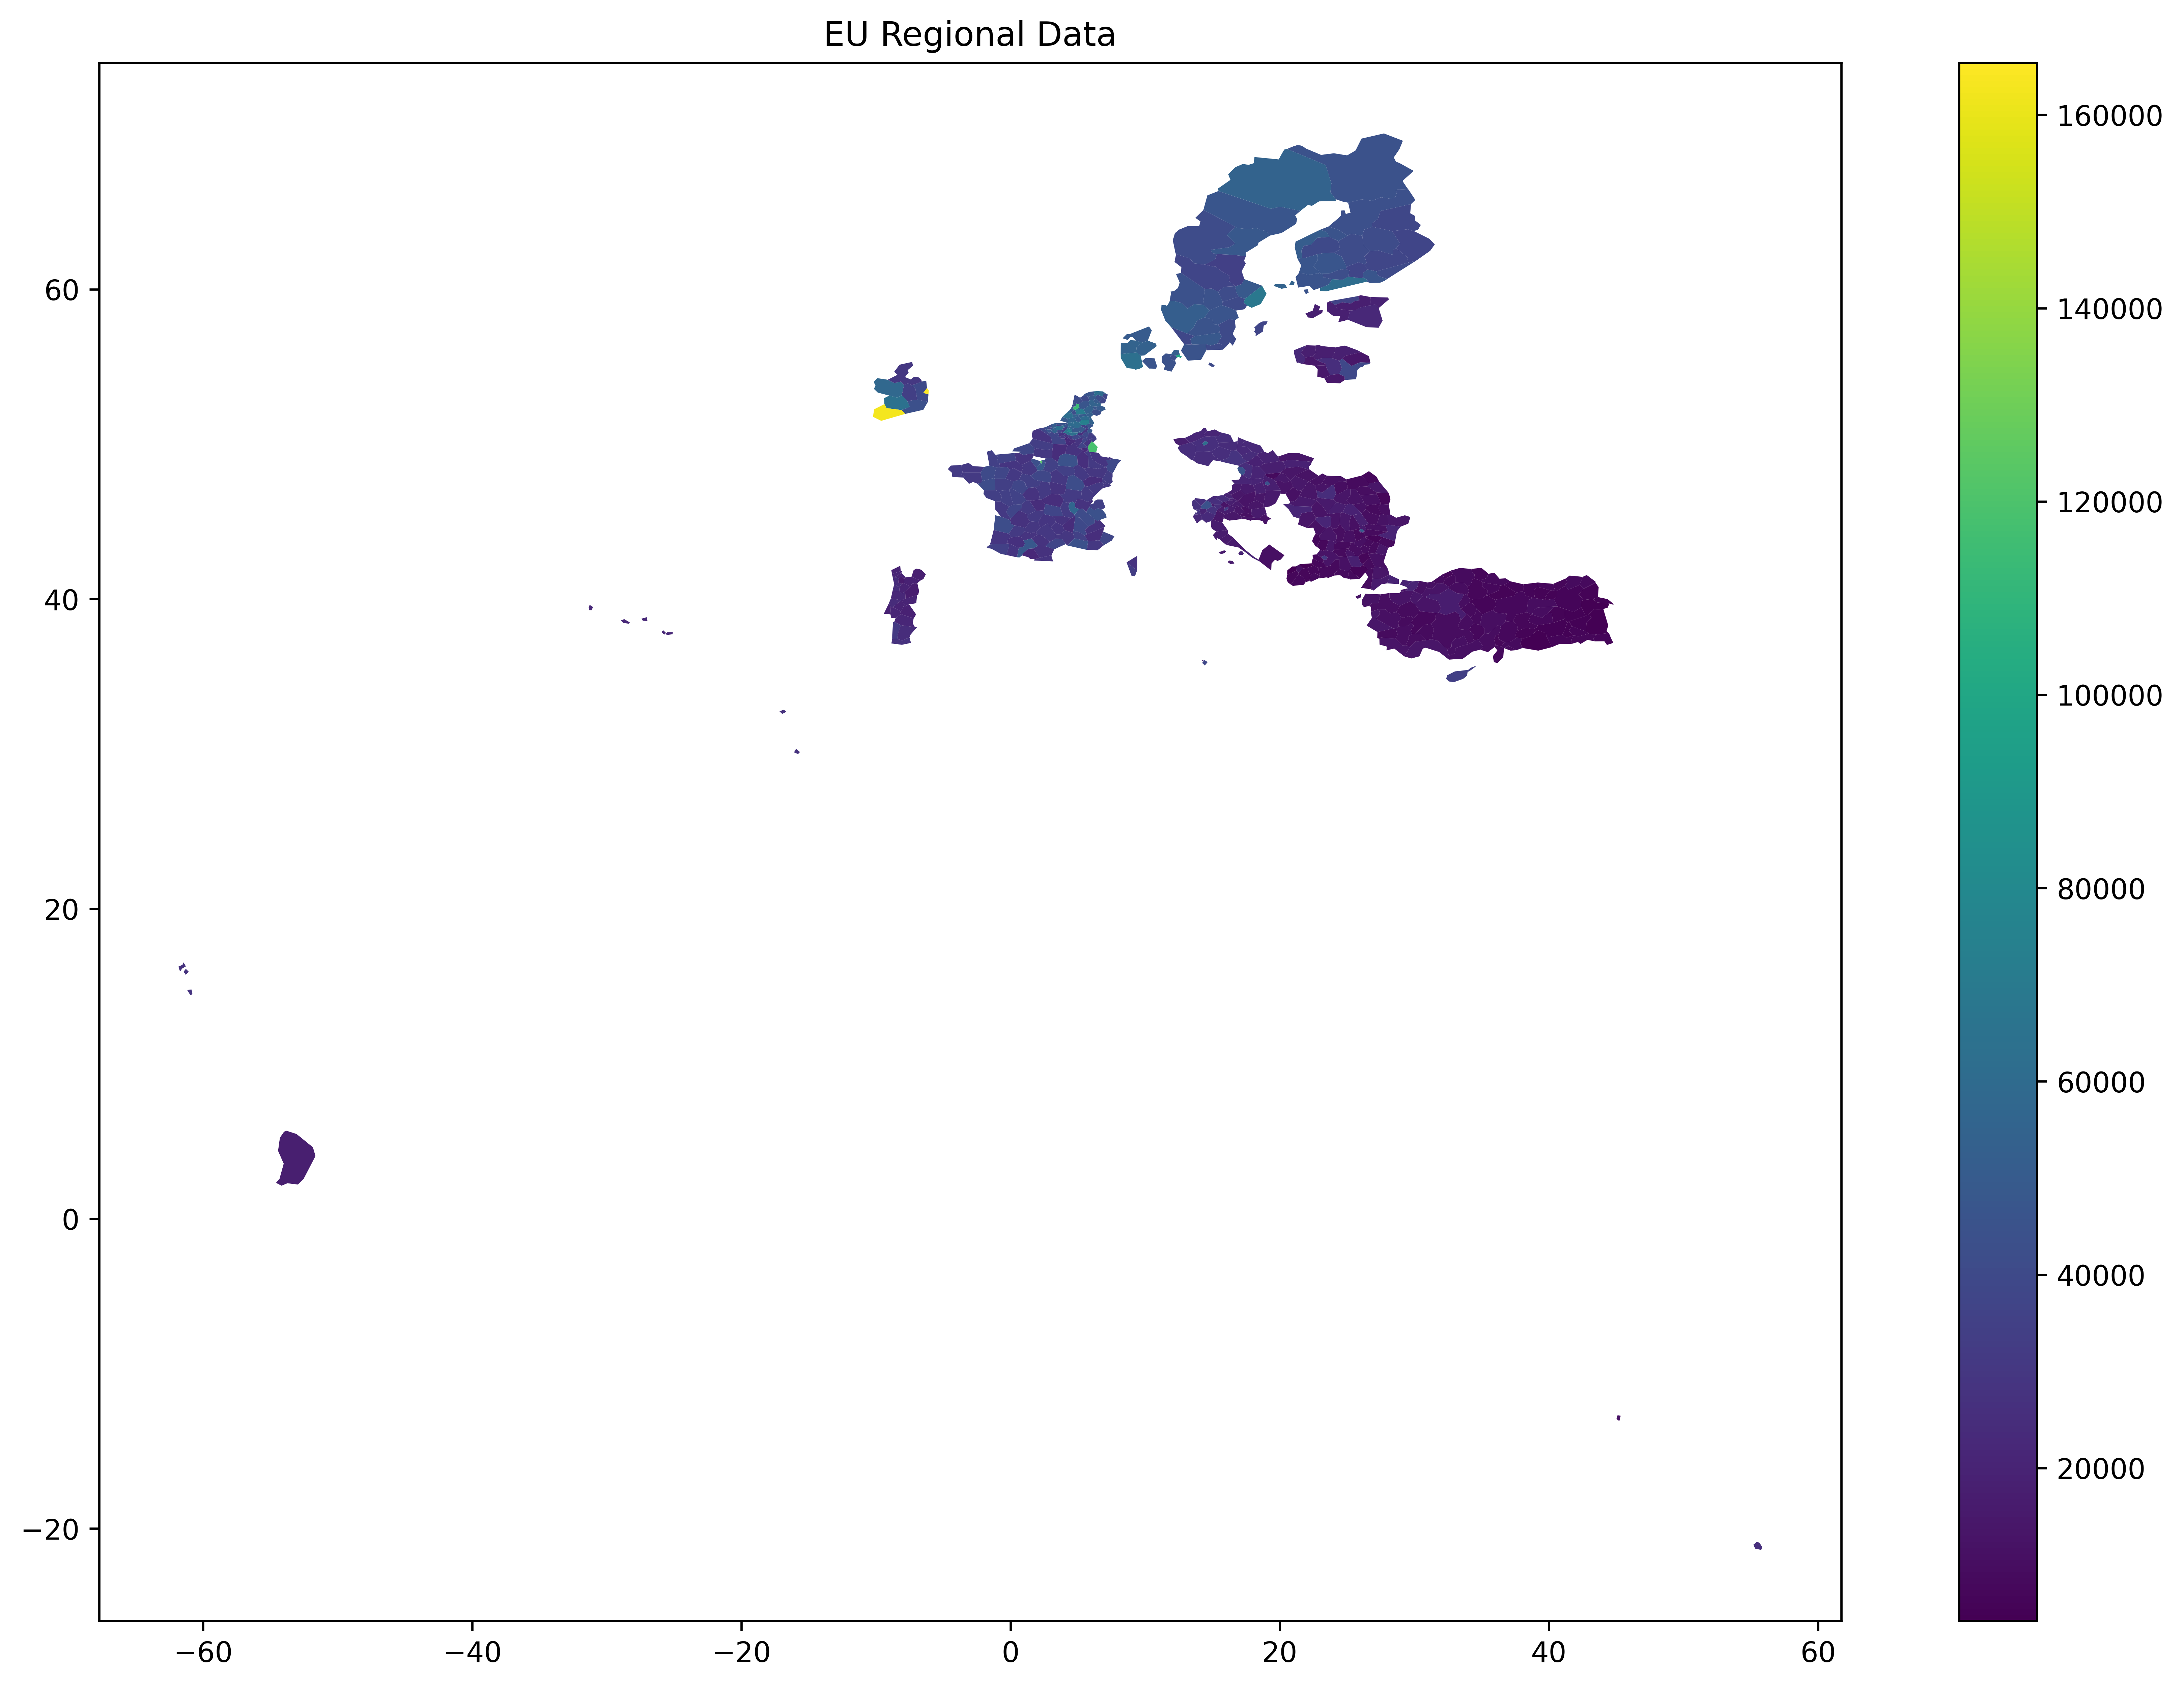

In [213]:
gdf = gpd.GeoDataFrame(gdf, geometry=gdf['geometry'])

# Set coordinate reference system (assuming WGS84)
gdf = gdf.set_crs(epsg=4326)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), dpi=600)
gdf.plot(column='2023', cmap='viridis', legend=True, ax=ax)
plt.title('EU Regional Data')

(-25.0, 45.0, 30.0, 72.0)

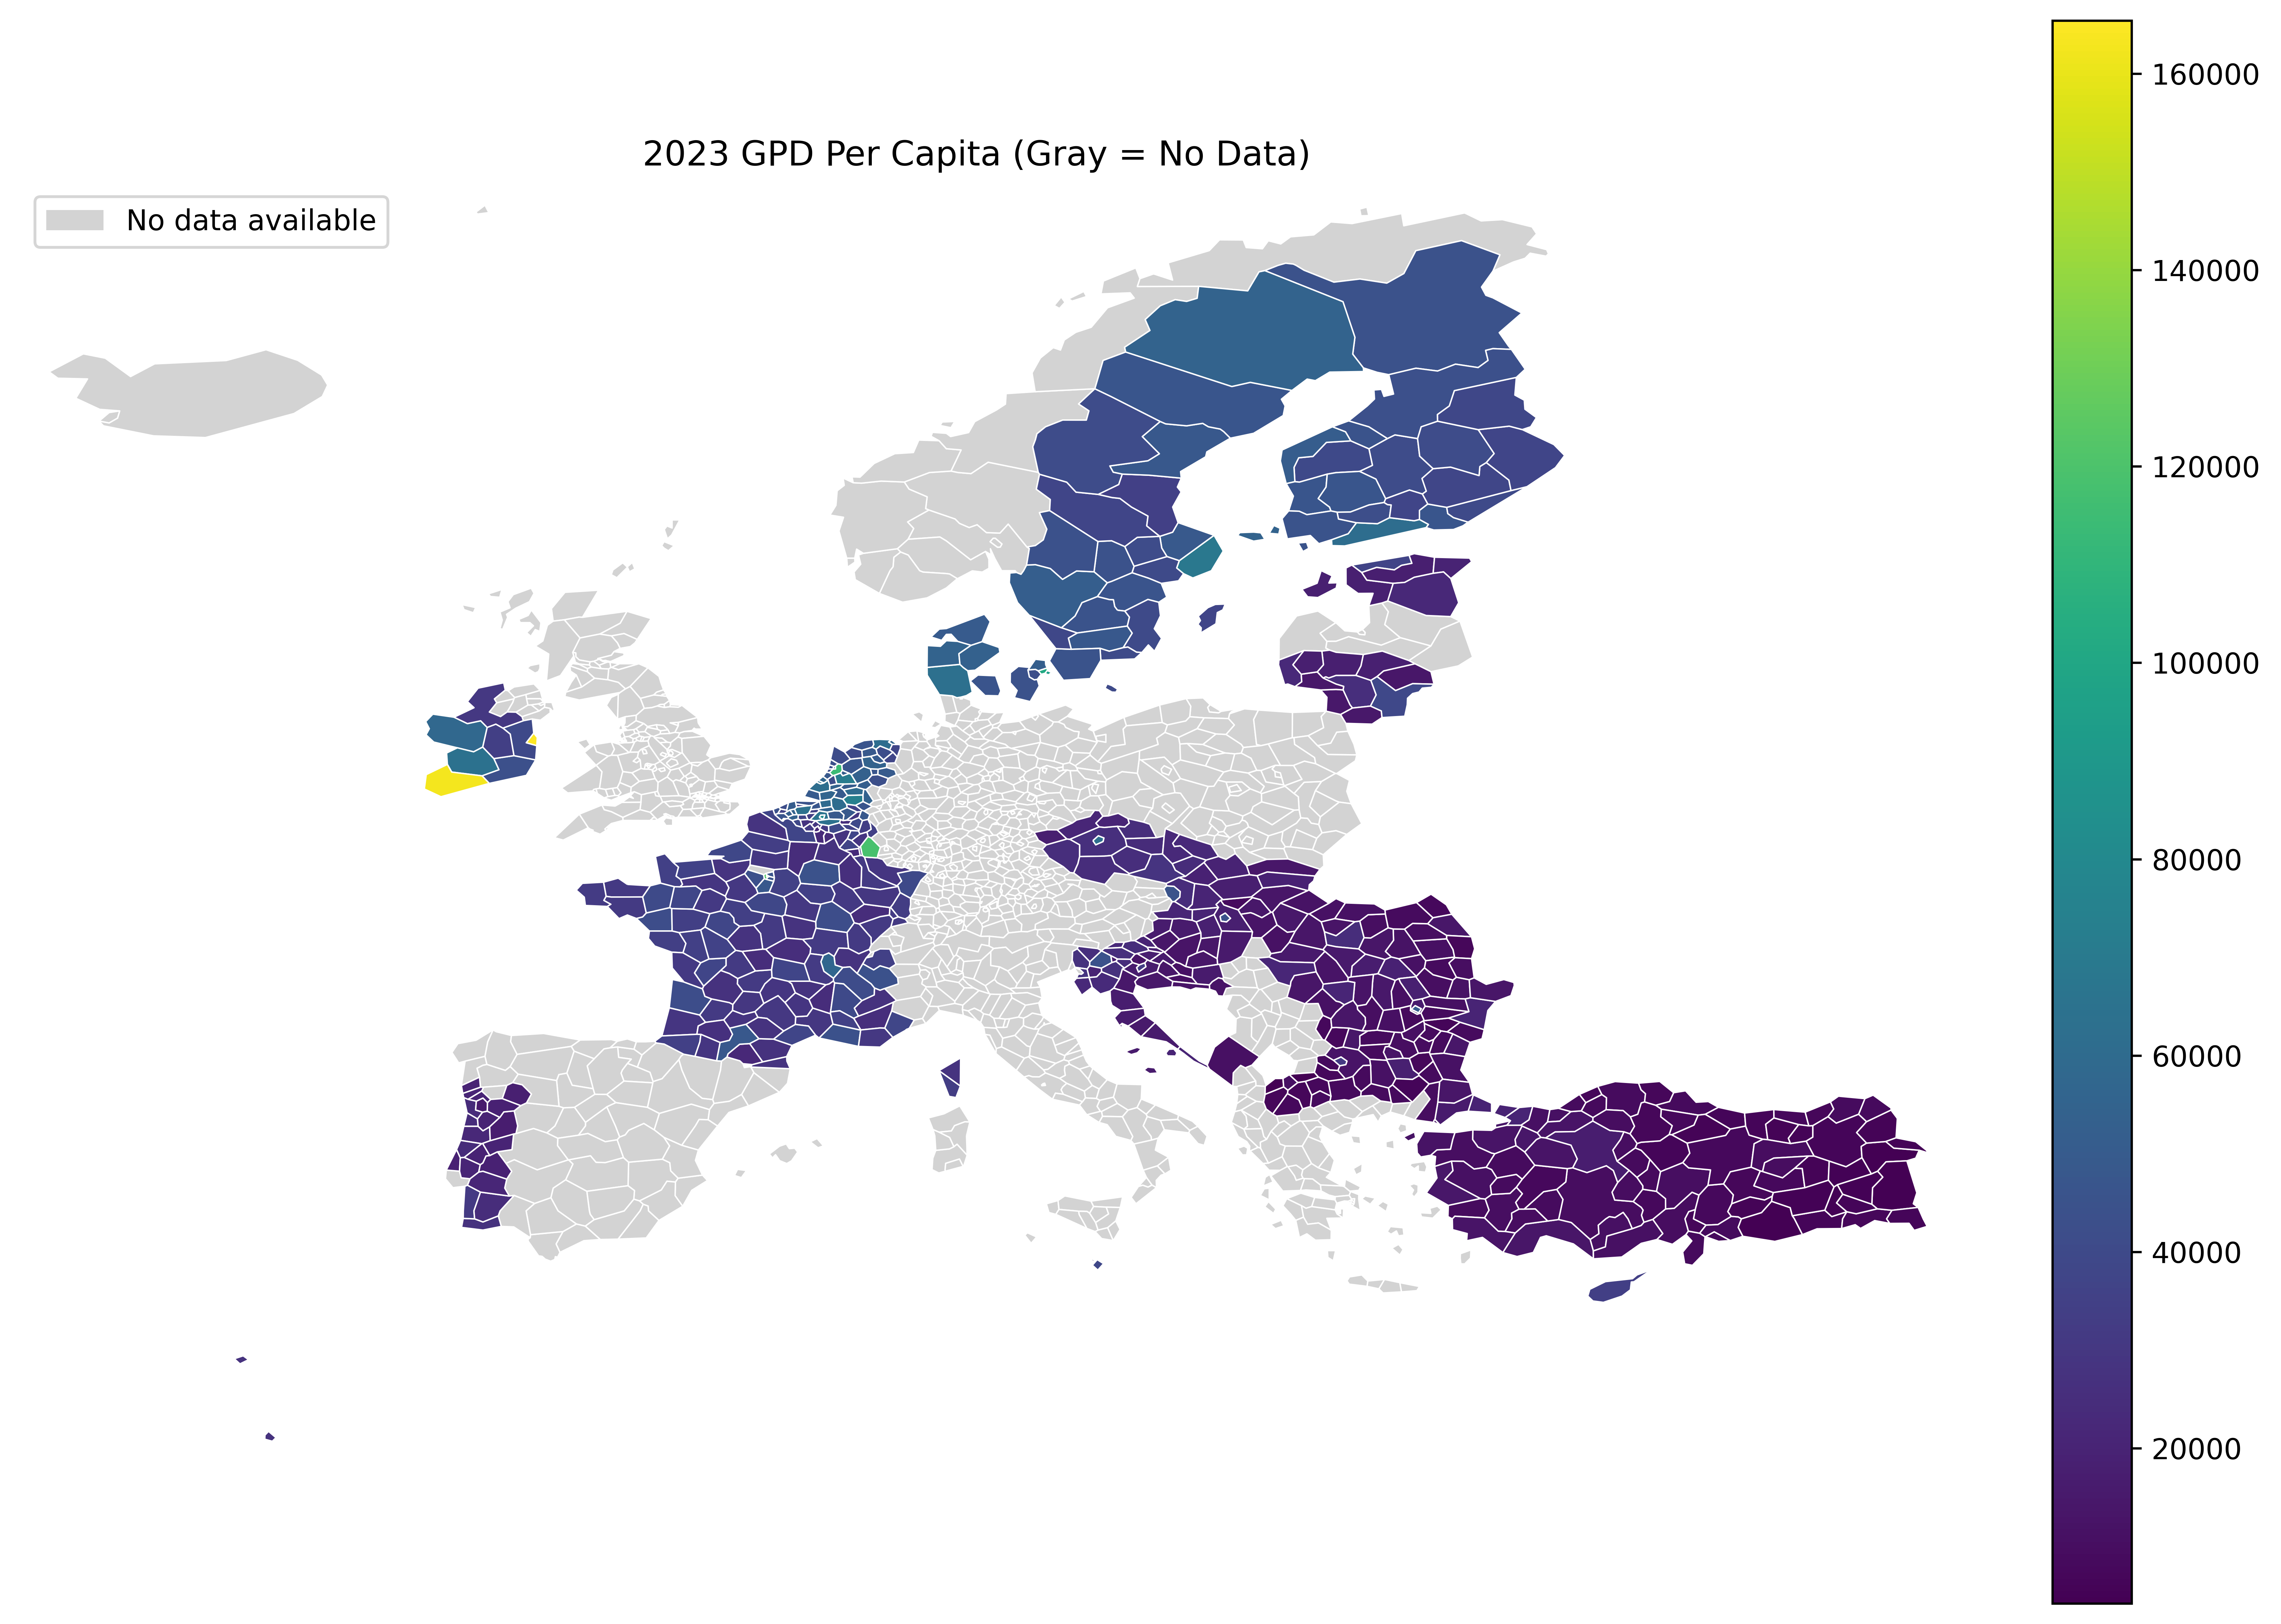

In [218]:
# Plot
fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

year = '2023'

# Plot regions with no data in light gray
no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Plot regions with data using your color scheme
has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='viridis', legend=True,
              edgecolor='white', linewidth=0.5)

# Add custom legend for no data
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} GPD Per Capita (Gray = No Data)')
ax.axis('off')